In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
na = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_probe.npy")
nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_probe.npy")
print(na.shape)

eloc_12 = np.load("/media/hdd01/sklee/CA1_clust12-20/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
eloc_8 = np.load("/media/hdd01/sklee/CA1_clust8-30/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
eloc_4 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")

dist = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust_dend_dist.npy")
dend = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust_dend.npy")
diam_length = np.load("/media/hdd01/sklee/CA1_clust4-60/data/dend_diam_length.npy")

#nona_sub_out = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_pos_output.npz")["sub_out"]
#na_sub_out = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_pos_output.npz")["sub_out"]
nona_sub_out = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["sub_out"]
na_sub_out = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["sub_out"]
nona_range = np.zeros((10,2))
na_range = np.zeros((10,2))

for i in range(10):
    #nona_low = np.mean(nona_sub_out[:,i,:]) - 2*np.std(nona_sub_out[:,i,:])
    #nona_high = np.mean(nona_sub_out[:,i,:]) + 2*np.std(nona_sub_out[:,i,:])
    #na_low = np.mean(na_sub_out[:,i,:]) - 2*np.std(na_sub_out[:,i,:])
    #na_high = np.mean(na_sub_out[:,i,:]) + 2*np.std(na_sub_out[:,i,:])
    
    nona_low = np.min(nona_sub_out[:,i,:])
    nona_high = np.max(nona_sub_out[:,i,:])
    na_low = np.min(na_sub_out[:,i,:])
    na_high = np.max(na_sub_out[:,i,:])
    
    nona_range[i,0] = nona_low
    nona_range[i,1] = nona_high
    na_range[i,0] = na_low
    na_range[i,1] = na_high
    
den_idx_12 = eloc_12[np.arange(880,1120,20), 0].astype(int)
half_idx_12 = np.asarray([6, 5, 13, 7, 0, 7, 3, 0, 5, 0, 14, 8])
new_half_idx_12 = np.delete(half_idx_12, [4,7,9])
new_den_idx_12 = np.delete(den_idx_12, [4,7,9])

den_idx_8 = eloc_8[np.arange(880,1120,30), 0].astype(int)
half_idx_8 = np.asarray([5,5,12,9,0,6,8,0])
new_half_idx_8 = np.delete(half_idx_8, [4,7])
new_den_idx_8 = np.delete(den_idx_8, [4,7])

new_den_idx_4 = eloc_4[np.arange(880,1120,20), 0].astype(int)
new_half_idx_4 = np.asarray([5,5,18,7])

new_shift_idx_12 = np.empty((9))
for i in range(9):
    idx = np.where(dend == new_den_idx_12[i])[0]
    new_shift_idx_12[i] = idx
new_shift_idx_12 = new_shift_idx_12.astype(int)
clust_idx_12 = np.asarray([0,1,2,3,5,6,8,10,11])

new_shift_idx_8 = np.empty((6))
for i in range(6):
    idx = np.where(dend == new_den_idx_8[i])[0]
    new_shift_idx_8[i] = idx
new_shift_idx_8 = new_shift_idx_8.astype(int)
clust_idx_8 = np.asarray([0,1,2,3,5,6])

new_shift_idx_4 = np.empty((4))
for i in range(4):
    idx = np.where(dend == new_den_idx_4[i])[0]
    new_shift_idx_4[i] = idx
new_shift_idx_4 = new_shift_idx_4.astype(int)
clust_idx_4 = np.asarray([0,1,2,3])

(8, 3, 30, 6000)


<ipython-input-4-cfd297a8f6c8>:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


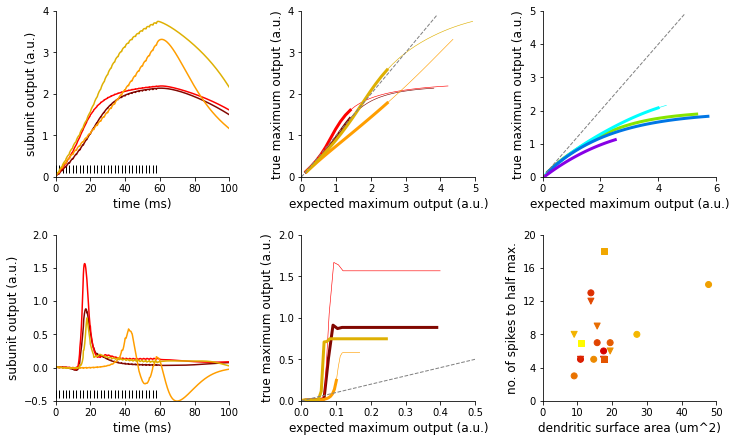

In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

#colors = ['#2fff00', '#ff00ff', '#8c00ff', '#00ff44', '#ff7300', '#00d0ff',
          #'#1500ff', '#00ffbb', '#ff0000', '#005eff', '#ffea00', '#a2ff00']

reds = ["#810701","#FF0000","#FF9E00","#DEB003"]
red4 = ["#D60000","#E45400","#F1A700","#FFFB00"]
red8 = ["#D60000","#DC2400","#E24800","#E86C00","#ED8F00","#F3B300","#F9D700","#FFFB00"]
red12 = ["#D60000","#DA1700","#DD2E00","#E14400","#E55B00","#E97200",
             "#EC8900","#F0A000","#F4B700","#F8CD00","#FBE400","#FFFB00"]
blues = ["#87E500", "#00ffff", "#0076E5", "#8700E5"]

sub_idx = [1,2,3,5,6,7,8,9]


fig = plt.figure(constrained_layout=True, figsize = (10,6))
gs = fig.add_gridspec(2,3, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])

for i in range(4):
    
    nona_clust_idx_yes = np.where((np.max(nona[i,0,:,500:] - np.min(nona[i,0,-1,500:1000]), 1) >= nona_range[sub_idx[i],0])\
                            & (np.max(nona[i,0,:,500:] - np.min(nona[i,0,-1,500:1000]), 1) < nona_range[sub_idx[i],1]))[0]
    nona_nonclust_idx_yes = np.where((np.max(nona[i+4,0,:,500:] - np.min(nona[i+4,0,-1,500:1000]), 1) >= nona_range[sub_idx[i+4],0])\
                            & (np.max(nona[i+4,0,:,500:] - np.min(nona[i+4,0,-1,500:1000]), 1) < nona_range[sub_idx[i+4],1]))[0]
    na_clust_idx_yes = np.where((np.max(na[i,0,:,500:] - np.min(na[i,0,-1,500:1000]), 1) >= na_range[sub_idx[i],0])\
                            & (np.max(na[i,0,:,500:] - np.min(na[i,0,-1,500:1000]), 1) < na_range[sub_idx[i+4],1]))[0]
    
    ax1.plot(np.arange(0,100,0.2), nona[i,0,-1,500:1000] - np.min(nona[i,0,-1,500:1000]),
             color=reds[i])
    
    #nona_clust_step = np.max(nona[i,0,:,500:] - np.min(nona[i,0,-1,500:1000]), 1)[0]
    nona_clust_step = np.max(nona[i,0,0,500:]) - np.min(nona[i,0,0,500:])
    ax2.plot(np.arange(nona_clust_step, nona_clust_step*31,nona_clust_step),
             np.max(nona[i,0,:,500:] - np.min(nona[i,0,-1,500:1000]), 1),
             color=reds[i], linewidth=0.6)
    ax2.plot(np.arange(nona_clust_step, nona_clust_step*31,nona_clust_step)[nona_clust_idx_yes],
             np.max(nona[i,0,:,500:] - np.min(nona[i,0,-1,500:1000]), 1)[nona_clust_idx_yes],
             color=reds[i], linewidth=3)
    
    
    #nona_nonclust_step = np.max(nona[i+4,0,:,500:] - np.min(nona[i+4,0,-1,500:1000]), 1)[0]
    nona_nonclust_step = np.max(nona[i+4,0,0,500:]) - np.min(nona[i+4,0,0,500:])
    ax3.plot(np.arange(nona_nonclust_step, nona_nonclust_step*31,nona_nonclust_step),
             np.max(nona[i+4,0,:,500:] - np.min(nona[i+4,0,-1,500:1000]), 1),
             color=blues[i], linewidth=0.6)
    ax3.plot(np.arange(nona_nonclust_step, nona_nonclust_step*31,nona_nonclust_step)[nona_nonclust_idx_yes], np.max(nona[i+4,0,:,500:] - np.min(nona[i+4,0,-1,500:1000]), 1)[nona_nonclust_idx_yes],
             color=blues[i], linewidth=3)
    
    #na_clust_step = np.max(na[i,0,:,500:] - np.min(na[i,0,-1,500:1000]), 1)[0]
    na_clust_step = np.max(na[i,0,0,500:]) - np.min(na[i,0,0,500:])
    ax4.plot(np.arange(0,100,0.2), na[i,0,-1,500:1000], color=reds[i])
    ax5.plot(np.arange(na_clust_step, na_clust_step*31,na_clust_step),
             np.max(na[i,0,:,500:], 1),
             color=reds[i], linewidth=0.6)
    ax5.plot(np.arange(na_clust_step, na_clust_step*31,na_clust_step)[na_clust_idx_yes],
             np.max(na[i,0,:,500:], 1)[na_clust_idx_yes],
             color=reds[i], linewidth=3)
    
    """
    if i == 2:
        ins = ax5.inset_axes([0.7,0.1,0.3,0.3])
        ins.plot(np.arange(na_clust_step, na_clust_step*31,na_clust_step),
                     np.max(na[2,0,:,500:], 1),
                     color=reds[i], linewidth=0.6)
        ins.plot(np.arange(na_clust_step, na_clust_step*31,na_clust_step)[na_clust_idx_yes],
                     np.max(na[2,0,:,500:], 1)[na_clust_idx_yes],
                     color=reds[i], linewidth=3)
        ins.spines.right.set_visible(False)
        ins.spines.top.set_visible(False)
    """
    
ax1.scatter(np.arange(0,60,2), np.ones(30)*0.2, marker="|", s=50, linewidth=1, color="black")    
ax4.scatter(np.arange(0,60,2), np.ones(30)*(-0.4), marker="|", s=50, linewidth=1, color="black")
    
ax2.plot(np.arange(0,4,0.1), np.arange(0,4,0.1),
             linewidth=1, color="gray", linestyle="--")
ax3.plot(np.arange(0,5,0.1), np.arange(0,5,0.1),
             linewidth=1, color="gray", linestyle="--")
ax5.plot(np.arange(0,2,0.1), np.arange(0,2,0.1),
             linewidth=1, color="gray", linestyle="--")
#ax5.set_ylim(0,2)
ax5.set_xlim(0,0.5)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]
for i in ax_list:
    i.spines.right.set_visible(False)
    i.spines.top.set_visible(False)
    
ax1.margins(x=0.01, y=0.01)
ax2.margins(x=0.01, y=0.01)
ax3.margins(x=0.01, y=0.01)
ax4.margins(x=0.01, y=0.01)
ax5.margins(x=0.01, y=0.01)
ax6.margins(x=0.01, y=0.01)
    
ax1.set_ylabel("subunit output (a.u.)", fontsize=12)
ax4.set_ylabel("subunit output (a.u.)", fontsize=12)
ax2.set_ylabel("true maximum output (a.u.)", fontsize=12)
ax5.set_ylabel("true maximum output (a.u.)", fontsize=12)
ax3.set_ylabel("true maximum output (a.u.)", fontsize=12)
ax6.set_ylabel("no. of spikes to half max.", fontsize=12)
ax1.set_xlabel("time (ms)", fontsize=12)
ax4.set_xlabel("time (ms)", fontsize=12)
ax2.set_xlabel('expected maximum output (a.u.)', fontsize=12)
ax3.set_xlabel('expected maximum output (a.u.)', fontsize=12)
ax5.set_xlabel('expected maximum output (a.u.)', fontsize=12)
ax6.set_xlabel("dendritic surface area (um^2)", fontsize=12)

ax1.set_xlim(0,100)
ax2.set_xlim(0,5)
ax3.set_xlim(0,6)
ax4.set_xlim(0,100)
ax5.set_xlim(0,0.5)
ax6.set_xlim(0,50)
ax1.set_ylim(0,4)
ax2.set_ylim(0,4)
ax3.set_ylim(0,5)
ax4.set_ylim(-0.5,2)
ax5.set_ylim(0,2)
ax6.set_ylim(0,20)

ax1.set_yticks(np.arange(0,4.1,1))
ax2.set_yticks(np.arange(0,4.1,1))
ax5.set_yticks(np.arange(0,2.1,0.5))
ax6.set_yticks(np.arange(0,20.1,4))

sa = np.pi * (diam_length[:,0]/2) ** 2 * diam_length[:,1]

ax6.scatter(sa[new_den_idx_12][:new_half_idx_12.size], new_half_idx_12, marker="o", c=red12[:-3], label="12 clusters")
ax6.scatter(sa[new_den_idx_8][:new_half_idx_8.size], new_half_idx_8, marker="v", c=red8[:-2], label="8 clusters")
ax6.scatter(sa[new_den_idx_4][:new_half_idx_4.size], new_half_idx_4, marker="s", c=red4, label="4 clusters")    
#legend = ax6.legend(fontsize=8, frameon=False, loc=(0.7,0.1))


fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig5/fig5_raw.pdf", bbox_inches="tight", transparent=True)